This dataset is about several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We are trying to predict here if the patients have diabetes or not.

In [3]:
#load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('/Users/paramikdasgupta/Desktop/data science/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#lets observer the shape of the dataframe
df.shape

(768, 9)

There are 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

In [5]:
#Lets create numpy arrays for features and target
X= df.drop('Outcome', axis=1).values
Y=df['Outcome'].values

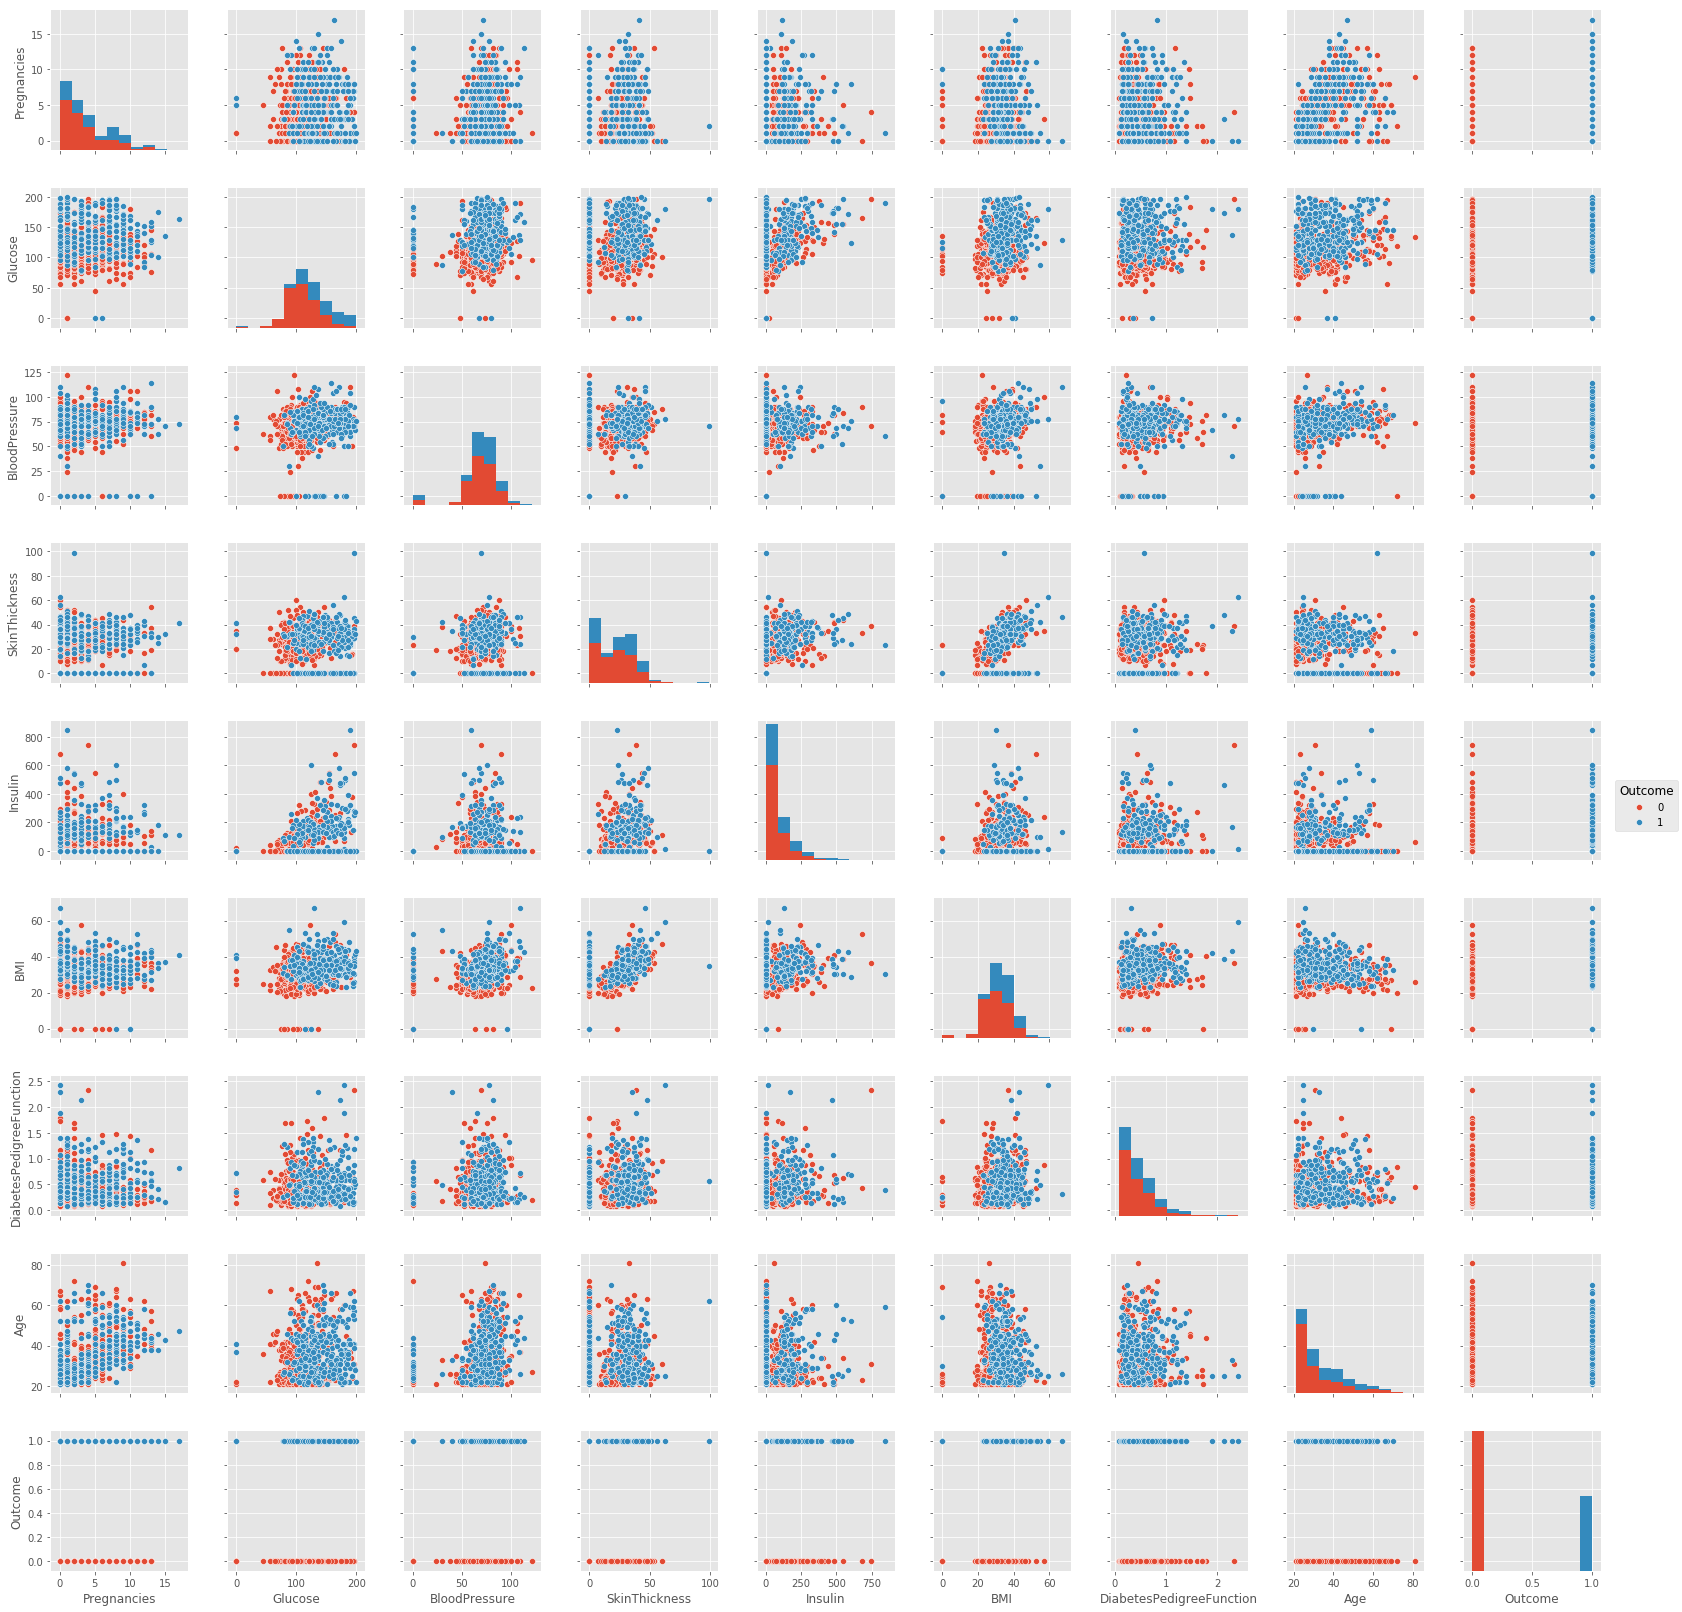

In [17]:
import seaborn as sns
sns.pairplot(df,hue='Outcome')


Lets split the data randomly into training and test set. We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare predictions with the known labels. 



In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

We want labels to be split in train and test set as they are in the original dataset. Hnece we use the stratify argument.
Also we create a test set of size of about 40% of the dataset.

In [7]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.4, random_state=42, stratify = Y)

Lets create a classifier using k-nearest neighbours algorithm. First, let us observer the accuracies for different values of k.


In [43]:
#import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observer that we get maximum testing accuracy for k=7. So lets create a classifier with number of neighbors as 7.



In [54]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 7)
#Fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [55]:
knn.score(X_test,Y_test)

0.7305194805194806

In [13]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [14]:
y_pred = knn.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.82      0.80       201
          1       0.62      0.56      0.59       107

avg / total       0.73      0.73      0.73       308



In [ ]:
Cross validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train
the model, and a test to evaluate it.
The value of k , i.e. 7 was selected based on observing the curve of accuarcy vs number
of neighbours. This is a primitive way of hyperparameter tuning.
Here, we will use GridSearchCV for cross validation and hyperparameter tuning.


In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,50)}

In [57]:
knn = KNeighborsClassifier()
knn_cv =GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
knn_cv.best_score_

0.7578125

In [59]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus the new accuarcy is 0.7578 which is around 76%.